In [65]:
library("ggplot2")

In [66]:
results = read.csv("times_julia.csv")

In [67]:
results

size,version,time
100,naive,0.002443635
100,better,0.001217586
100,blas,0.000143515
100,naive,0.002450687
100,better,0.001329366
100,blas,0.000346622
100,naive,0.003545563
100,better,0.001218291
100,blas,0.000145631
100,naive,0.002447867


In [68]:
avg_results = aggregate(time ~ size:version, data=results, FUN=mean)

In [69]:
avg_results

size,version,time
100,better,0.0013600786
200,better,0.0105331956
300,better,0.0348329779
400,better,0.0805659080
500,better,0.1787720400
600,better,0.2701192094
700,better,0.4506271115
800,better,0.6786966854
900,better,1.3767831397
1000,better,1.8276182244


In [70]:
avg_results$sd = aggregate(time ~ size:version, data = results, FUN=sd)$time

In [71]:
avg_results

size,version,time,sd
100,better,0.0013600786,2.771692e-04
200,better,0.0105331956,6.766562e-04
300,better,0.0348329779,2.014575e-03
400,better,0.0805659080,2.486488e-03
500,better,0.1787720400,1.755475e-02
600,better,0.2701192094,5.302172e-03
700,better,0.4506271115,2.264007e-02
800,better,0.6786966854,1.077455e-02
900,better,1.3767831397,7.566468e-01
1000,better,1.8276182244,7.665833e-01


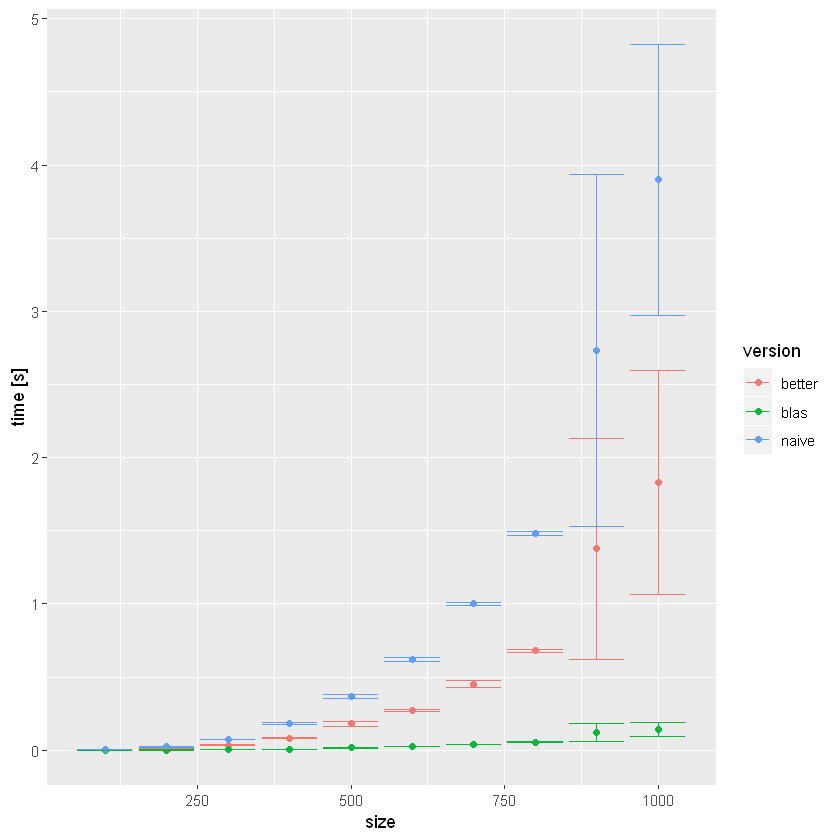

In [72]:
ggplot(avg_results, aes(x = size, y = time, color = version)) + 
geom_point() + 
labs(y = "time [s]") +
geom_errorbar(aes(ymin=time-sd, ymax=time+sd))

In [99]:
avg_results_naive <- avg_results[which(avg_results$version == "naive"), ]
fit_naive = lm(time ~ poly(size, 3, raw=TRUE),
        ,data=avg_results_naive)

In [100]:
avg_results_better <- avg_results[which(avg_results$version == "better"), ]
fit_better = lm(time ~ poly(size, 3, raw=TRUE),
        ,data=avg_results_better)

In [101]:
avg_results_blas <- avg_results[which(avg_results$version == "blas"), ]
fit_blas = lm(time ~ poly(size, 3, raw=TRUE),
        ,data=avg_results_blas)

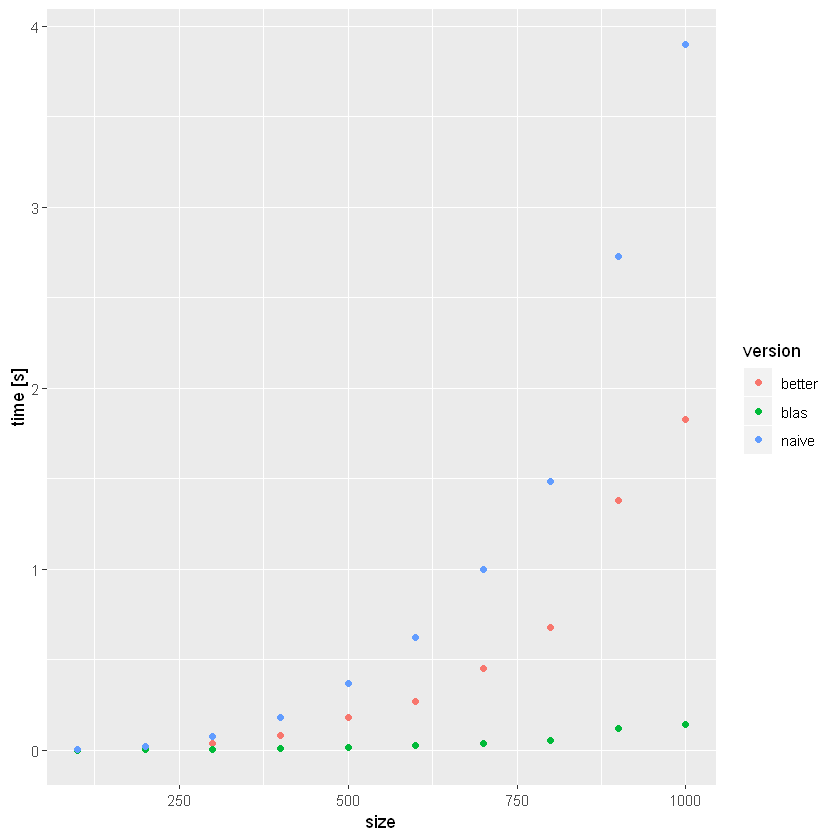

In [147]:
ggplot(avg_results, aes(x = size, y = time, color = version)) + 
geom_point() + 
labs(y = "time [s]")

In [135]:
newdata_naive = data.frame(size = seq(100,1000, length.out=901))
newdata_naive$version = "naive"
newdata_naive$time = predict(fit_naive, newdata)

In [136]:
newdata_better = data.frame(size = seq(100,1000, length.out=901))
newdata_better$version = "better"
newdata_better$time = predict(fit_better, newdata)

In [137]:
newdata_blas = data.frame(size = seq(100,1000, length.out=901))
newdata_blas$version = "blas"
newdata_blas$time = predict(fit_blas, newdata)

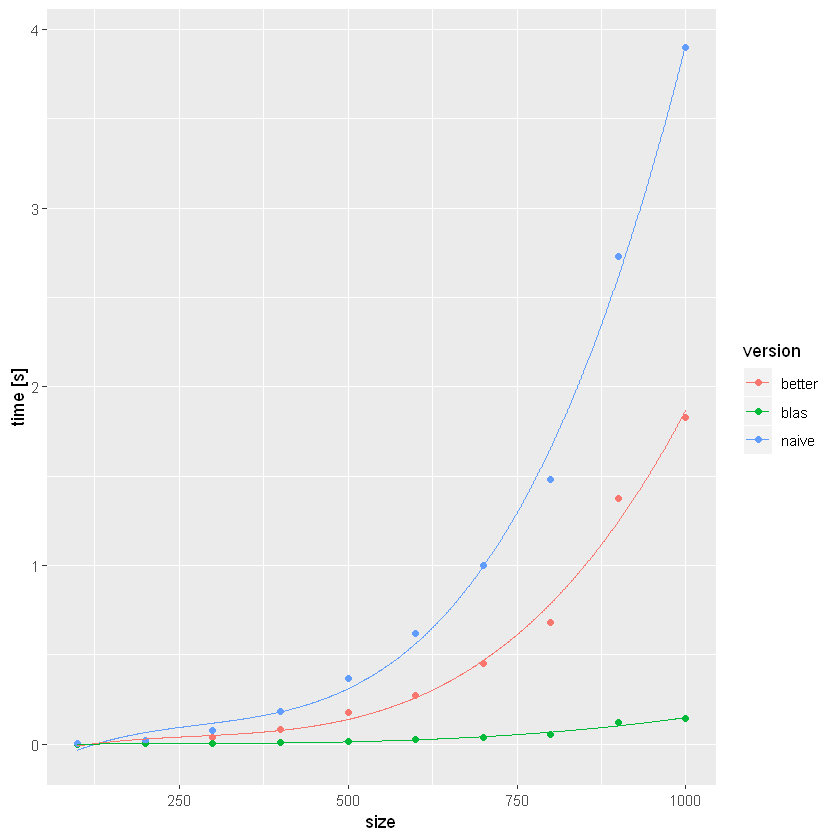

In [148]:
last_plot() + 
    geom_line(data=newdata_naive, 
    aes(x = size, y = time, color = version)
    ) + 
    geom_line(data=newdata_better, 
    aes(x = size, y = time, color = version)
    ) +
    geom_line(data=newdata_blas, 
    aes(x = size, y = time, color = version)
    )